In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()

In [2]:
root_path = r'C:\Users\54638\Desktop\Cannelle\Excel handling'
input_path = os.path.join(root_path, "input")
output_path = os.path.join(root_path, "output")

In [6]:
%%time 
# this line magic function should always be put on first line of the cell, and without comments followed after in the same line

# Read all Excel file
all_deals = pd.DataFrame()

for file in os.listdir(input_path):
    # can add other criteria as you want
    if file[-4:] == 'xlsx': 
        tmp = pd.read_excel(os.path.join(input_path,file), index_col = 'order_no')
        all_deals = pd.concat([all_deals, tmp])

# reindex, otherwise you may have many lines with same index
# all_deals = all_deals.reset_index() # this method is not recommended here, as it will pop out the original index 'order_no'
all_deals.index = range(len(all_deals))

Wall time: 3.32 s


In [7]:
all_deals.head()
# all_deals.tail()
# all_deals.shape
# all_deals.describe()

,counterparty,deal,way,nominal,currency,trade_date
0,Credit Agricole,Autocall,sell,231000,AUD,2019-04-17
1,SinoPac,Variance Swap,buy,179000,USD,2019-04-16
2,Jefferies,Hybrid,buy,221000,JPY,2019-04-10
3,Citi,Digital,sell,207000,CNY,2019-04-30
4,Credit Agricole,ForwardStart,sell,174000,GBP,2019-04-27


In [8]:
# overview
all_deals['counterparty'].value_counts().sort_values(ascending = False)
# all_deals['counterparty'].unique()

HSBC               4305
Goldman Sachs      3517
BNP Paribas        3361
Credit Agricole    2967
Citi               2789
CLSA               2695
Credit Suisse      2370
Natixis            2191
Deutsche Bank      2004
BOCI               1672
Fidelity           1325
JPMorgan           1277
Jefferies          1002
Blackstone          784
SinoPac             641
UBS                 363
CICC                350
Name: counterparty, dtype: int64

In [9]:
all_deals['deal'].value_counts().sort_values(ascending = False)

Accumulator            6688
Autocall               5433
Vanilla                3727
Range Accrual          3641
Digital                3118
Hybrid                 3008
Twinwin                2630
Variance Swap          1695
ForwardBasket          1370
ForwardStart           1319
Cross Currency Swap     984
Name: deal, dtype: int64

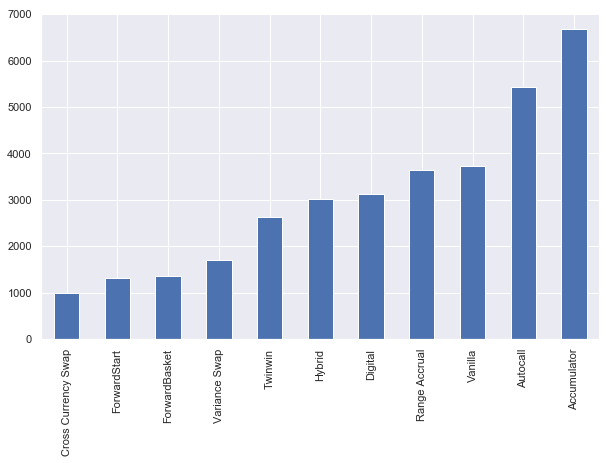

In [10]:
deal_vol = all_deals['deal'].value_counts().sort_values()
deal_vol.plot(figsize = (10,6), kind = 'bar');

In [11]:
# Some slicing
all_deals[all_deals['deal'] == 'Accumulator']

,counterparty,deal,way,nominal,currency,trade_date
6,Credit Agricole,Accumulator,sell,80000,EUR,2019-04-12
7,Citi,Accumulator,sell,90000,GBP,2019-04-28
8,HSBC,Accumulator,sell,40000,CNY,2019-04-13
11,BOCI,Accumulator,sell,186000,AUD,2019-04-16
17,CLSA,Accumulator,sell,228000,CNY,2019-04-15
...,...,...,...,...,...,...
33586,Natixis,Accumulator,buy,66000,GBP,2019-09-12
33594,BNP Paribas,Accumulator,sell,247000,USD,2019-09-17
33605,Credit Suisse,Accumulator,buy,212000,AUD,2019-09-22
33607,Goldman Sachs,Accumulator,sell,208000,KRW,2019-09-14


In [12]:
all_deals[(all_deals['deal'] == 'Variance Swap') 
          & (all_deals['counterparty'].isin(['Citi','HSBC']))]

,counterparty,deal,way,nominal,currency,trade_date
20,Citi,Variance Swap,sell,60000,CNY,2019-04-29
30,Citi,Variance Swap,buy,67000,CNY,2019-04-28
167,HSBC,Variance Swap,buy,194000,EUR,2019-04-06
404,HSBC,Variance Swap,buy,233000,EUR,2019-04-28
439,HSBC,Variance Swap,buy,73000,EUR,2019-04-03
...,...,...,...,...,...,...
33407,HSBC,Variance Swap,buy,95000,KRW,2019-09-23
33449,Citi,Variance Swap,sell,102000,GBP,2019-09-15
33512,Citi,Variance Swap,sell,193000,GBP,2019-09-22
33545,HSBC,Variance Swap,buy,60000,GBP,2019-09-14


In [13]:
all_deals.groupby('currency').sum()
# all_deals.groupby('currency')[['nominal']].sum()

,nominal
currency,
AUD,300295000
CNY,988319000
EUR,692516000
GBP,405318000
JPY,681512000
KRW,633394000
SGP,390245000
USD,932109000


In [14]:
ccy_way = all_deals.groupby(['way','currency']).sum().unstack('currency')
ccy_way

nominal                                                         \
currency        AUD        CNY        EUR        GBP        JPY        KRW   
way                                                                          
buy       149042000  500266000  341829000  207834000  335859000  321517000   
sell      151253000  488053000  350687000  197484000  345653000  311877000   

                                
currency        SGP        USD  
way                             
buy       195669000  471729000  
sell      194576000  460380000

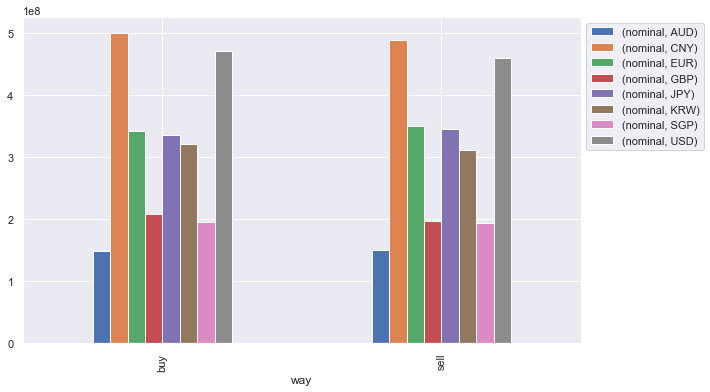

In [15]:
ccy_way.plot(figsize = (10,6), kind ='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

In [16]:
# pivot_table
all_deals.pivot_table(values = 'nominal', 
                      index='counterparty', columns='deal', aggfunc='count')

deal,Accumulator,Autocall,Cross Currency Swap,Digital,ForwardBasket,ForwardStart,Hybrid,Range Accrual,Twinwin,Vanilla,Variance Swap
counterparty,,,,,,,,,,,
BNP Paribas,667,540,97,331,112,120,327,382,265,378,142
BOCI,305,266,40,167,70,47,177,163,134,211,92
Blackstone,143,146,22,55,33,36,74,70,68,88,49
CICC,63,57,10,36,12,14,23,48,24,44,19
CLSA,530,463,79,218,120,100,238,289,213,309,136
Citi,561,441,94,245,105,127,252,311,213,307,133
Credit Agricole,596,484,80,281,116,124,244,350,211,334,147
Credit Suisse,469,391,64,215,93,103,211,246,198,262,118
Deutsche Bank,413,306,56,179,73,75,178,212,165,240,107


In [17]:
# save data
# ccy_way.to_excel(os.path.join(output_path,"Extract.xlsx"))

file_name = "Extract" + ".xlsx"
sheet_name = "Extract"
writer = pd.ExcelWriter(os.path.join(output_path, file_name), engine = 'xlsxwriter')
ccy_way.to_excel(writer, sheet_name=sheet_name)

# adjust the column width
worksheet = writer.sheets[sheet_name]
for id, col in enumerate(ccy_way):
    series = ccy_way[col]
    max_len = max(
                series.astype(str).map(len).max(),   # len of largest item
                len(str(series.name))   # len of column name
                 ) + 3   # a little extra space
    max_len = min(max_len, 30)   # set a cap, dont be too long
    worksheet.set_column(id+1, id+1, max_len)
writer.save()

In [3]:
# Deleting all the file
del_path = input_path
for file in os.listdir(del_path):
    os.remove(os.path.join(del_path, file))

In [4]:
# Generating file, all the data you see is just randomly created
import calendar

# Transaction generator
def generate_data(year, month):
    
    order_amount = max(int(np.random.randn()*200)+500,0) + np.random.randint(2000)
    start_loc = 1

    order_no = np.arange(start_loc,order_amount+start_loc)

    countparty_list = ['JPMorgan', 'Credit Suisse', 'Deutsche Bank', 'BNP Paribas', 'Credit Agricole', 'SinoPac', 'Goldman Sachs', 'Citi',
                      'Blackstone', 'HSBC', 'Natixis', 'BOCI', 'UBS', 'CLSA', 'CICC', 'Fidelity', 'Jefferies']
    countparty_prob = [0.04, 0.07, 0.06, 0.1, 0.09, 0.02, 0.1, 0.08, 0.025, 0.13, 0.065, 0.05, 0.01, 0.08, 0.01, 0.04, 0.03]
    countparty = np.random.choice(countparty_list, size=order_amount, p=countparty_prob)

    deal_list = ['Autocall', 'Accumulator', 'Range Accrual', 'Variance Swap', 'Vanilla', 'Digital', 'Twinwin', 'ForwardStart',
                 'ForwardBasket', 'Cross Currency Swap', 'Hybrid']
    deal_prob = [0.16, 0.2, 0.11, 0.05, 0.11, 0.09, 0.08, 0.04, 0.04, 0.03, 0.09]
    deal = np.random.choice(deal_list, size=order_amount, p=deal_prob)

    way = np.random.choice(['buy','sell'], size=order_amount)

    nominal = [(int(np.random.randn()*10) + np.random.randint(200)+ 50)*1000 for _ in range(order_amount)]
    
    currency_list = ['USD', 'CNY', 'EUR', 'SGP', 'JPY', 'KRW', 'AUD', 'GBP']
    currency_prob = [0.185, 0.195, 0.14, 0.08, 0.135, 0.125, 0.06, 0.08]
    currency = np.random.choice(currency_list, size=order_amount, p=currency_prob)
    
    datelist = list(date for date in calendar.Calendar().itermonthdates(year, month) if date.month == month)
    trade_date = np.random.choice(datelist, size=order_amount)
    
    data = {'order_no': order_no, 'counterparty': countparty, 'deal':deal, 'way': way, 'nominal': nominal, 
            'currency':currency, 'trade_date': trade_date}
    
    
    return pd.DataFrame(data)

In [5]:
save_path = input_path
cur_month = 4
cur_year = 2018
for i in range(24):
    if cur_month == 12:
        cur_month = 1
        cur_year +=1
    else:
        cur_month += 1
        
    df = generate_data(cur_year, cur_month)
    df_name = 'Derivatives Transaction '+calendar.month_abbr[cur_month]+' '+str(cur_year)+'.xlsx'
    df.to_excel(os.path.join(save_path, df_name), index = False)